In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/def_bmp')
os.getcwd()

'/content/gdrive/My Drive/def_bmp'

In [ ]:
path = '/content/gdrive/My Drive/def_bmp'
files = os.listdir(path)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Model
from keras.layers import Conv2D,Conv2DTranspose,MaxPooling2D,concatenate,Dropout,Input,Lambda, BatchNormalization, Reshape
from keras import backend as K
from scipy.ndimage.measurements import label
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import glob
import tensorflow as tf

In [ ]:
import cv2
items = os.listdir('/content/gdrive/My Drive/def_bmp')
print (items)
for each_image in items:
  if each_image.endswith(".bmp"):
      
      full_path ='content/gdrive/My Drive/def_bmp/train' + each_image
      print (full_path)
      image = cv2.imread(full_path)
      print (image)

['img-41.cmp', 'img-42.cmp', 'img-43.cmp', 'img-44.cmp', 'img-45.cmp', 'img-46.cmp', 'img-47.cmp', 'img-48.cmp', 'img-49.cmp', 'img-50.cmp', 'img-52.cmp', 'img-53.cmp', 'img-54.cmp', 'img-55.cmp', 'img-56.cmp', 'img-57.cmp', 'img-58.cmp', 'img-59.cmp', 'img-61.cmp', 'img-62.cmp', 'img-63.cmp', 'img-64.cmp', 'img-65.cmp', 'img-66.cmp', 'img-67.cmp', 'img-68.cmp', 'img-69.cmp', 'img-70.cmp', 'img-71.cmp', 'img-72.cmp', 'img-73.cmp', 'img-74.cmp', 'img-75.cmp', 'img-76.cmp', 'img-78.cmp', 'img-79.cmp', 'img-80.cmp', 'img-81.cmp', 'img-82.cmp', 'img-84.cmp', 'img-85.cmp', 'img-86.cmp', 'img-88.cmp', 'img-89.cmp', 'img-90.cmp', 'img-92.cmp', 'img-93.cmp', 'img-94.cmp', 'img-95.cmp', 'img-96.cmp', 'img-97.cmp', 'img-98.cmp', 'img-99.cmp', 'img-100.cmp', 'missing1.cmp', 'missing2.cmp', 'missing3.cmp', 'missing4.cmp', 'missing5.cmp', 'missing6.cmp', 'missing7.cmp', 'missing8.cmp', 'missing9.cmp', 'missing10.cmp', 'missing11.cmp', 'missing12.cmp', 'missing13.cmp', 'missing14.cmp', 'missing15.cm

In [ ]:
import cv2
train_items = os.listdir('/content/gdrive/My Drive/def_bmp/train/')
print (train_items)
print(len(train_items))


['missing9.bmp', 'missing5.bmp', 'missing2.bmp', 'missing1.bmp', 'missing7.bmp', 'missing11.bmp', 'missing4.bmp', 'missing22.bmp', 'missing8.bmp', 'missing6.bmp', 'missing29.bmp', 'missing19.bmp', 'missing27.bmp', 'missing10.bmp', 'missing25.bmp', 'missing3.bmp', 'missing14.bmp', 'missing18.bmp', 'missing15.bmp', 'missing16.bmp', 'missing28.bmp', 'missing24.bmp', 'missing12.bmp', 'missing13.bmp', 'missing21.bmp', 'missing30.bmp', 'missing17.bmp', 'missing20.bmp', 'missing26.bmp', 'missing23.bmp', 'img-81.bmp', 'img-78.bmp', 'img-42.bmp', 'img-41.bmp', 'img-56.bmp', 'img-61.bmp', 'img-74.bmp', 'img-45.bmp', 'img-85.bmp', 'img-82.bmp', 'img-72.bmp', 'img-66.bmp', 'img-79.bmp', 'img-84.bmp', 'img-59.bmp', 'img-58.bmp', 'img-63.bmp', 'img-76.bmp', 'img-69.bmp', 'img-62.bmp', 'img-53.bmp', 'img-68.bmp', 'img-43.bmp', 'img-46.bmp', 'img-54.bmp', 'img-75.bmp', 'img-73.bmp', 'img-55.bmp', 'img-64.bmp', 'img-77.bmp', 'img-44.bmp', 'img-48.bmp', 'img-50.bmp', 'img-49.bmp', 'img-86.bmp', 'img-47.

In [ ]:
X_train = []

for each_image in train_items:
  if each_image.endswith(".bmp"):
      
      full_path ='/content/gdrive/My Drive/def_bmp/train/' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = image/255.
      
      X_train.append(image)

      #print (image)

X_train = np.asarray(X_train)

print(X_train.shape)

(80, 128, 128, 3)


In [ ]:
import cv2
train_mask_items = os.listdir('/content/gdrive/My Drive/def_bmp/train/')
print (train_mask_items)
print(len(train_mask_items))

['missing9.bmp', 'missing5.bmp', 'missing2.bmp', 'missing1.bmp', 'missing7.bmp', 'missing11.bmp', 'missing4.bmp', 'missing22.bmp', 'missing8.bmp', 'missing6.bmp', 'missing29.bmp', 'missing19.bmp', 'missing27.bmp', 'missing10.bmp', 'missing25.bmp', 'missing3.bmp', 'missing14.bmp', 'missing18.bmp', 'missing15.bmp', 'missing16.bmp', 'missing28.bmp', 'missing24.bmp', 'missing12.bmp', 'missing13.bmp', 'missing21.bmp', 'missing30.bmp', 'missing17.bmp', 'missing20.bmp', 'missing26.bmp', 'missing23.bmp', 'img-81.bmp', 'img-78.bmp', 'img-42.bmp', 'img-41.bmp', 'img-56.bmp', 'img-61.bmp', 'img-74.bmp', 'img-45.bmp', 'img-85.bmp', 'img-82.bmp', 'img-72.bmp', 'img-66.bmp', 'img-79.bmp', 'img-84.bmp', 'img-59.bmp', 'img-58.bmp', 'img-63.bmp', 'img-76.bmp', 'img-69.bmp', 'img-62.bmp', 'img-53.bmp', 'img-68.bmp', 'img-43.bmp', 'img-46.bmp', 'img-54.bmp', 'img-75.bmp', 'img-73.bmp', 'img-55.bmp', 'img-64.bmp', 'img-77.bmp', 'img-44.bmp', 'img-48.bmp', 'img-50.bmp', 'img-49.bmp', 'img-86.bmp', 'img-47.

In [ ]:
y_train = []

for each_image in train_mask_items:
  if each_image.endswith(".png"):
      
      full_path ='/content/gdrive/My Drive/def_bmp/train/' + each_image
      
      image = cv2.imread(full_path,0)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      
      y_train.append(image)

      #print (image)
print(image.shape)
y_train = np.asarray(y_train)
y_train = y_train.reshape((80,128,128,1))

print(y_train.shape)

(128, 128)
(80, 128, 128, 1)


In [ ]:
import cv2
valid_items = os.listdir('/content/gdrive/My Drive/def_bmp/valid/')
print (valid_items)
print(len(valid_items))


['missing34.bmp', 'missing36.bmp', 'missing32.bmp', 'missing35.bmp', 'missing37.bmp', 'missing38.bmp', 'missing39.bmp', 'missing40.bmp', 'missing31.bmp', 'missing33.bmp', 'img-92.bmp', 'img-96.bmp', 'img-93.bmp', 'img-95.bmp', 'img-99.bmp', 'img-97.bmp', 'img-100.bmp', 'img-98.bmp', 'img-94.bmp', 'img-91.bmp', 'img-91.png', 'img-92.png', 'img-99.png', 'img-94.png', 'img-97.png', 'img-93.png', 'img-95.png', 'img-98.png', 'img-96.png', 'missing32.png', 'missing39.png', 'missing37.png', 'missing31.png', 'missing40.png', 'missing38.png', 'missing33.png', 'missing35.png', 'missing34.png', 'missing36.png', 'img-100.png']
40


In [ ]:
X_valid = []

for each_image in valid_items:
  if each_image.endswith(".bmp"):
      
      full_path ='/content/gdrive/My Drive/def_bmp/valid/' + each_image
      
      image = cv2.imread(full_path)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = image/255.
      X_valid.append(image)

      #print (image)
print(image.shape)
X_valid = np.asarray(X_valid)

print(X_valid.shape)

(128, 128, 3)
(20, 128, 128, 3)


In [ ]:
import cv2
valid_mask_items = os.listdir('/content/gdrive/My Drive/def_bmp/valid/')
print (valid_mask_items)
print(len(valid_mask_items))

['missing34.bmp', 'missing36.bmp', 'missing32.bmp', 'missing35.bmp', 'missing37.bmp', 'missing38.bmp', 'missing39.bmp', 'missing40.bmp', 'missing31.bmp', 'missing33.bmp', 'img-92.bmp', 'img-96.bmp', 'img-93.bmp', 'img-95.bmp', 'img-99.bmp', 'img-97.bmp', 'img-100.bmp', 'img-98.bmp', 'img-94.bmp', 'img-91.bmp', 'img-91.png', 'img-92.png', 'img-99.png', 'img-94.png', 'img-97.png', 'img-93.png', 'img-95.png', 'img-98.png', 'img-96.png', 'missing32.png', 'missing39.png', 'missing37.png', 'missing31.png', 'missing40.png', 'missing38.png', 'missing33.png', 'missing35.png', 'missing34.png', 'missing36.png', 'img-100.png']
40


In [ ]:
y_valid = []

for each_image in valid_mask_items:
  if each_image.endswith(".png"):
      
      full_path ='/content/gdrive/My Drive/def_bmp/valid/' + each_image
      
      image = cv2.imread(full_path,0)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      
      y_valid.append(image)

      #print (image)
print(image.shape)
y_valid = np.asarray(y_valid)
y_valid = y_valid.reshape((20,128,128,1))
print(y_valid.shape)

(128, 128)
(20, 128, 128, 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(80, 128, 128, 3)
(80, 128, 128, 1)
(20, 128, 128, 3)
(20, 128, 128, 1)


In [ ]:

input_lr = Input(shape =(128,128,3))
#input_norm = Lambda(lambda x: x/127.5 -1.)(input_lr)

x = Conv2D(filters = 32,kernel_size = (1,1),strides =(1,1),padding = "same",activation='tanh',use_bias=False,kernel_initializer='random_normal')(input_lr)
x = BatchNormalization()(x)




x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)

x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
x = BatchNormalization()(x)
"""
#x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
#x = BatchNormalization()(x)

#x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
#x = BatchNormalization()(x)

#x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
#x = BatchNormalization()(x)

#x = Conv2D(filters =8,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',use_bias=False,kernel_initializer='random_normal')(x)
#x = BatchNormalization()(x)
"""

x = Conv2D(filters =256,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',kernel_initializer='random_normal',use_bias=False)(x)
x = BatchNormalization()(x)

x = Conv2D(filters =256,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',kernel_initializer='random_normal',use_bias=False)(x)
x = BatchNormalization()(x)

x = Conv2D(filters =1,kernel_size=(3,3),strides=(1,1),padding='same',activation='tanh',kernel_initializer='random_normal',use_bias=False)(x)
x = BatchNormalization()(x)

x = Conv2D(filters =1,kernel_size=(1,1),strides=(1,1),padding='same',activation='tanh',kernel_initializer='lecun_normal',use_bias=False)(x)

output = Reshape((128,128,1))(x)


seg_model = Model(inputs = [input_lr], outputs =[output])

seg_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 128, 128, 32)      96        
_________________________________________________________________
batch_normalization_113 (Bat (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 128, 128, 8)       256       
_________________________________________________________________
batch_normalization_114 (Bat (None, 128, 128, 8)       32        
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 128, 128, 8)       64        
_________________________________________________________________
batch_normalization_115 (Bat (None, 128, 128, 8)       32  

In [ ]:
optimizer = Adam(lr=1e-6,beta_1=0.9, beta_2=0.99, epsilon = 1e-6,decay = 0.000001)
seg_model.compile(optimizer=Adam(2e-4, decay=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('seg_model')

checkpoint = ModelCheckpoint(weight_path, monitor='accuracy', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='accuracy', factor=0.5, 
                                   patience=50, 
                                   verbose=1, mode='max', min_delta=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="accuracy", 
                      mode="max", 
                      patience=50) # probably needs to be more patient
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
seg_model.fit(X_train,y_train,batch_size=8,epochs=50,validation_data = (X_valid,y_valid),shuffle=True,verbose=2,callbacks = [callbacks_list])

Epoch 1/50
10/10 - 4s - loss: 3.9994 - accuracy: 0.5832 - val_loss: 4.4026 - val_accuracy: 0.5776

Epoch 00001: accuracy improved from 0.49208 to 0.58318, saving model to seg_model_weights.best.hdf5
Epoch 2/50
10/10 - 1s - loss: 3.1080 - accuracy: 0.5832 - val_loss: 4.0461 - val_accuracy: 0.5776

Epoch 00002: accuracy did not improve from 0.58318
Epoch 3/50
10/10 - 1s - loss: 3.0913 - accuracy: 0.5832 - val_loss: 3.6192 - val_accuracy: 0.5776

Epoch 00003: accuracy did not improve from 0.58318
Epoch 4/50
10/10 - 1s - loss: 3.1038 - accuracy: 0.5832 - val_loss: 3.5504 - val_accuracy: 0.5776

Epoch 00004: accuracy did not improve from 0.58318
Epoch 5/50
10/10 - 1s - loss: 3.0013 - accuracy: 0.5832 - val_loss: 3.4242 - val_accuracy: 0.5776

Epoch 00005: accuracy did not improve from 0.58318
Epoch 6/50
10/10 - 1s - loss: 3.2796 - accuracy: 0.5832 - val_loss: 3.2922 - val_accuracy: 0.5776

Epoch 00006: accuracy did not improve from 0.58318
Epoch 7/50
10/10 - 1s - loss: 3.0593 - accuracy: 0.

In [ ]:
#seg_model.load_weights(weight_path)
seg_model.save('full_best_model_edges.h5')

In [ ]:
seg_model.save_weights('seg_model_weights_edges.h5')

In [ ]:
import cv2
predict_items = os.listdir('/content/gdrive/My Drive/test/')
print(predict_items)
print(len(predict_items))

['img-0.bmp', 'img-0.png', 'img-7.png', 'missing2.png', 'img-1.png', 'img-1.bmp', 'missing2.bmp', 'img-7.bmp']
8


In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted ']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
predict_items = os.listdir('/content/gdrive/My Drive/test')
print(predict_items)

['img-0.bmp', 'img-0.png', 'img-7.png', 'missing2.png', 'img-1.png', 'img-1.bmp', 'missing2.bmp', 'img-7.bmp']


In [ ]:

predict_seg_items = os.listdir('/content/gdrive/My Drive/test/')
print (predict_seg_items)
print(len(predict_seg_items))

['img-0.bmp', 'img-0.png', 'img-7.png', 'missing2.png', 'img-1.png', 'img-1.bmp', 'missing2.bmp', 'img-7.bmp']
8


In [ ]:
X_predict = []
for each_image in predict_items:
  if each_image.endswith(".bmp"):
      
      full_path ='/content/gdrive/My Drive/test/' + each_image
      
      image = cv2.imread(full_path,1)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      
      X_predict.append(image)

      #print (image)
print(image.shape)
X_predict = np.asarray(X_predict)

print(X_predict.shape)

(128, 128, 3)
(4, 128, 128, 3)


In [ ]:
predict_mask = []

for each_image in predict_seg_items:
  if each_image.endswith(".png"):
      
      full_path ='/content/gdrive/My Drive/test/' + each_image
      
      image = cv2.imread(full_path,0)
      image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
      
      predict_mask.append(image)

      #print (image)
print(image.shape)
predict_mask = np.asarray(predict_mask)
predict_mask = predict_mask.reshape((4,128,128,1))
print(predict_mask.shape)

(128, 128)
(4, 128, 128, 1)


In [ ]:
predict_true_mask = np.asarray(predict_mask)
print(predict_mask.shape)


(4, 128, 128, 1)


In [ ]:
predict = seg_model.predict(X_predict)

In [ ]:

predict = np.asarray(predict)
print(predict.shape)

(4, 128, 128, 1)


In [ ]:
print(X_predict.shape)
print(X_predict[0].shape)

(4, 128, 128, 3)
(128, 128, 3)


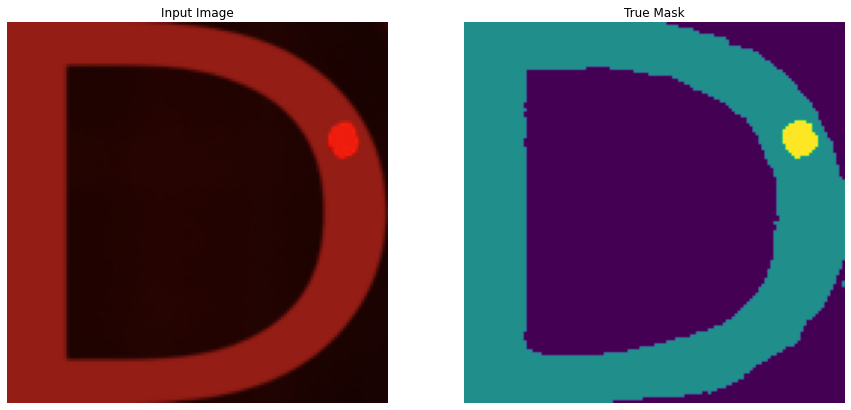

In [ ]:
sample_image = X_predict[0]
sample_mask = predict_mask[0]
display([sample_image, sample_mask])


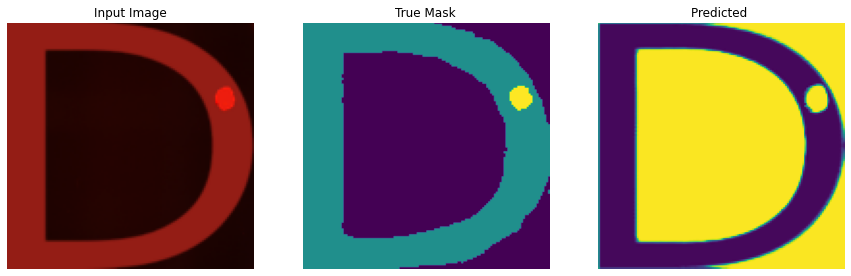

In [ ]:
display([X_predict[0], predict_mask[0], predict[0]])

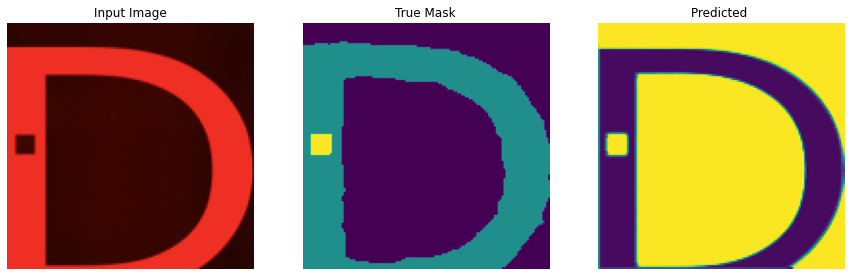

In [ ]:
display([X_predict[2], predict_mask[2], predict[2]])

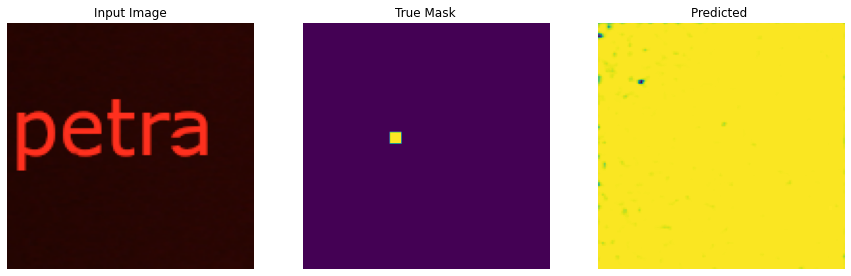

In [ ]:
display([X_predict[3], predict_mask[3], predict[3]])

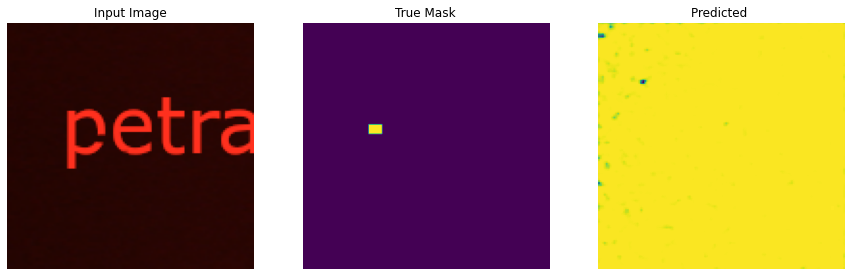

In [ ]:
display([X_predict[4], predict_mask[4], predict[4]])